# Análise de crescimento Alucel

In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot as aplot#biblioteca utilizada para fazer estudos de correlação
sns.set_palette('pastel')#deixando o gráfico com paleta de cores
sns.set_style('whitegrid')
from statsmodels.tsa.seasonal import seasonal_decompose#essa biblioteca monta frquencia, ruido e sazonalidade
print('Bibliotecas importadas com sucesso')

Bibliotecas importadas com sucesso


In [3]:
def plotar(titulo,labelx,labely,x,y,dataset):#definindo uma função para facilitar o trabalho
        sns.set_palette('Accent')#deixando o gráfico com paleta de cores
        sns.set_style('darkgrid')#adicionando grade
        ax = sns.lineplot(x=x,y=y,data=dataset)
        ax.figure.set_size_inches(12,6)#aumentando o tamanho, interessante que quando falamos da figura, precisamos do .figure
        ax.set_title(titulo, loc = 'left',fontsize=18)#adicionando titulo
        ax.set_xlabel(labelx,fontsize=14)#adicionando titulo eixo x
        ax.set_ylabel(labely,fontsize=14)#adicionando titulo eixo y
        ax = ax#dessa maneira removemos uma linha que fica em cima com dados da memória
def plot_comp(x,y1,y2,y3,dataset,titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18,loc='left')
    sns.lineplot(x=x,y=y1,data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2,data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3,data=dataset)
    ax = ax
def analise_geral(x,y1,y2,y3,dados,titulo):
    dados[y2] = dados[y1].diff()
    dados[y3] = dados[y2].diff()
    plot_comp(x,y1,y2,y3,dados,titulo)

In [7]:
dados = pd.read_csv('dados/alucel.csv',sep=',')
dados.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [9]:
dados.shape

(61, 2)

In [10]:
dados.isna().sum()

dia       0
vendas    0
dtype: int64

In [11]:
dados['dia'] = pd.to_datetime(dados['dia'])

In [12]:
dados.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

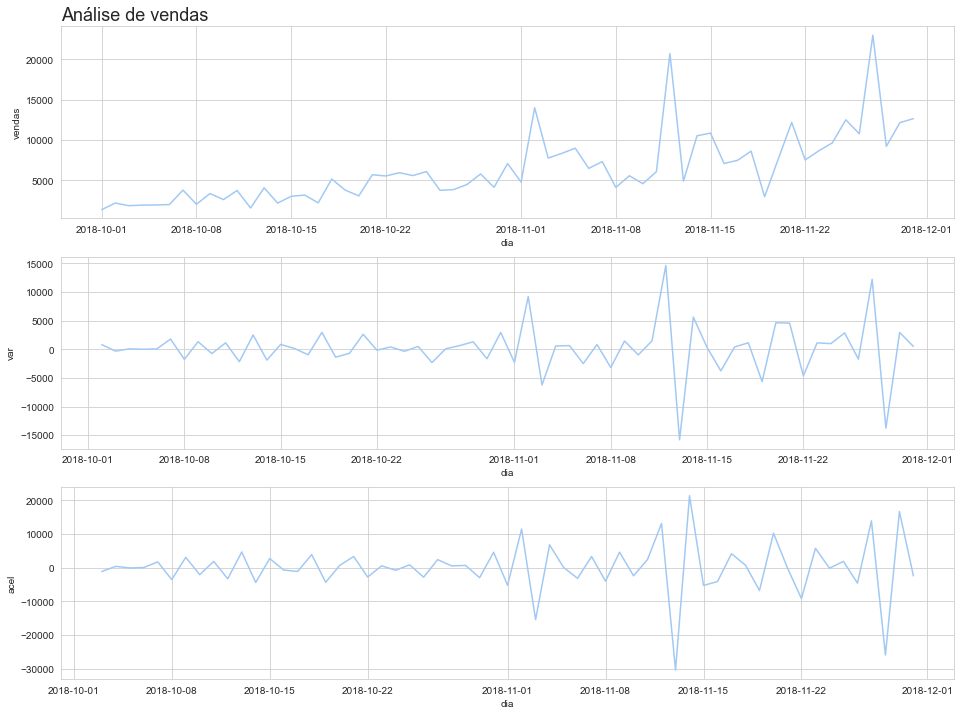

In [13]:
analise_geral('dia','vendas','var','acel',dados,'Análise de vendas ')

## Utilizando média movel para análise

In [19]:
dados['media movel'] = dados['vendas'].rolling(7).mean()
dados.head(7)

,dia,vendas,var,acel,media movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


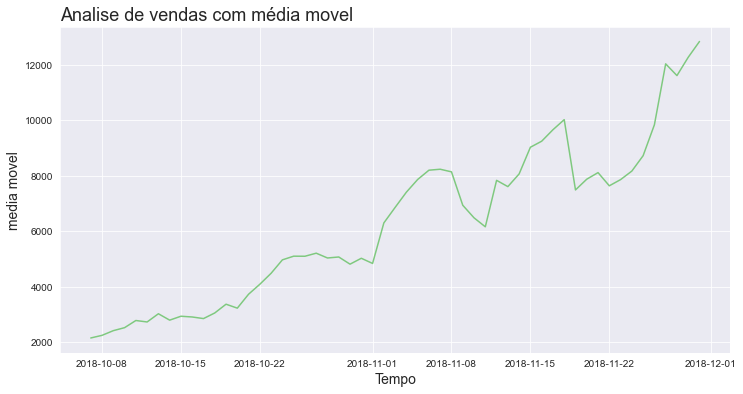

In [21]:
plotar('Analise de vendas com média movel',"Tempo","media movel",'dia','media movel',dados)

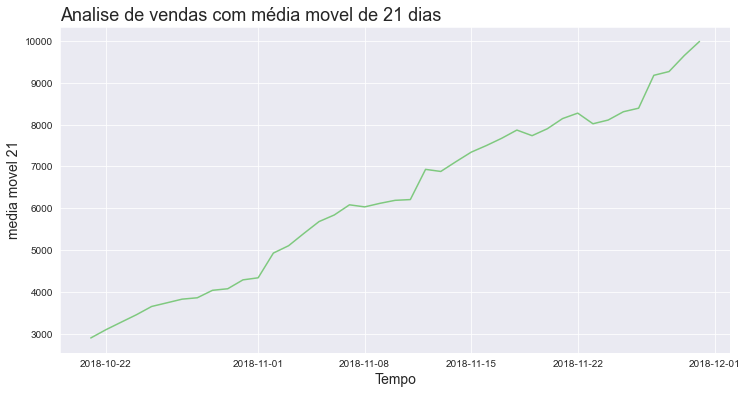

In [22]:
dados['media movel_21'] = dados['vendas'].rolling(21).mean()
plotar('Analise de vendas com média movel de 21 dias',"Tempo","media movel 21",'dia','media movel_21',dados)

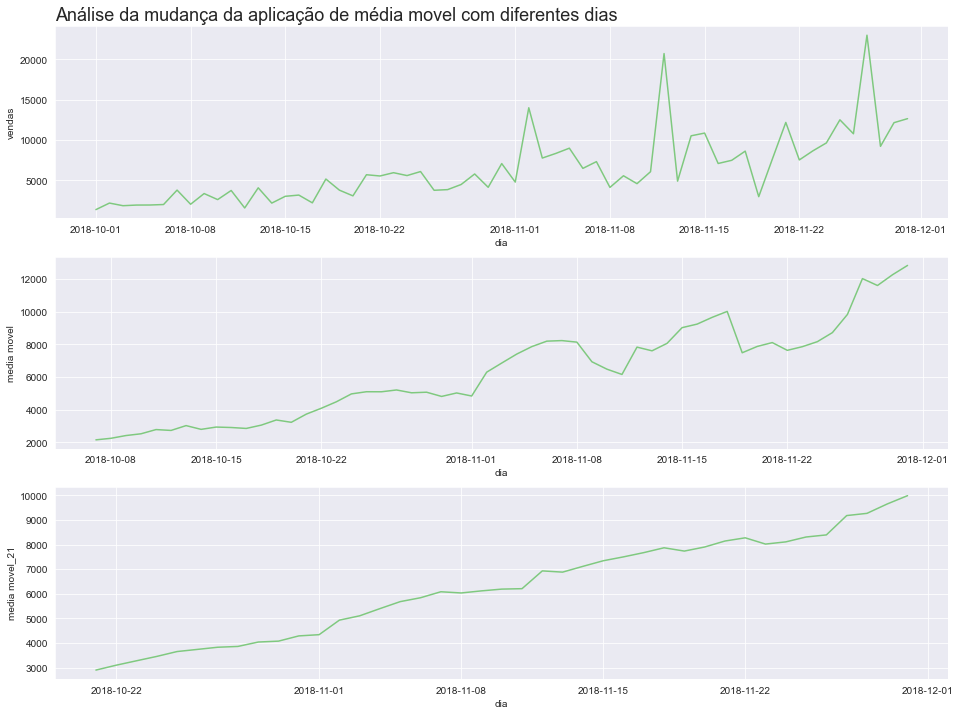

In [23]:
plot_comp('dia','vendas','media movel','media movel_21',dados,'Análise da mudança da aplicação de média movel com diferentes dias')

#### Percebemos que utilizar maiores medias moveis diminuem o ruido(normalizam), lembrando que maiores periodos acarretam em perda de dados